In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style = 'whitegrid')

In [32]:
acoes = ['TOTS3.SA', 'ABEV3.SA', 'VALE3.SA', 'B3SA3.SA']

ydata = yf.download(acoes, '2020-01-01', '2024-03-01', 'id')
dados = ydata['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [16]:
dados = dados * 100/ dados.iloc[0]
display(dados)

Ticker,ABEV3.SA,B3SA3.SA,TOTS3.SA,VALE3.SA
Date,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000
2020-01-03,98.593757,97.118159,102.125815,99.263782
2020-01-06,99.062489,96.187102,99.797553,98.674753
2020-01-07,99.270839,99.290639,100.216927,99.392607
2020-01-08,98.802084,99.024611,98.872018,99.411013
...,...,...,...,...
2024-02-23,79.690154,95.816381,143.250213,177.119141
2024-02-26,80.617500,96.047266,143.204779,172.834429
2024-02-27,82.286730,98.125214,142.023520,177.382028


<Axes: xlabel='Date'>

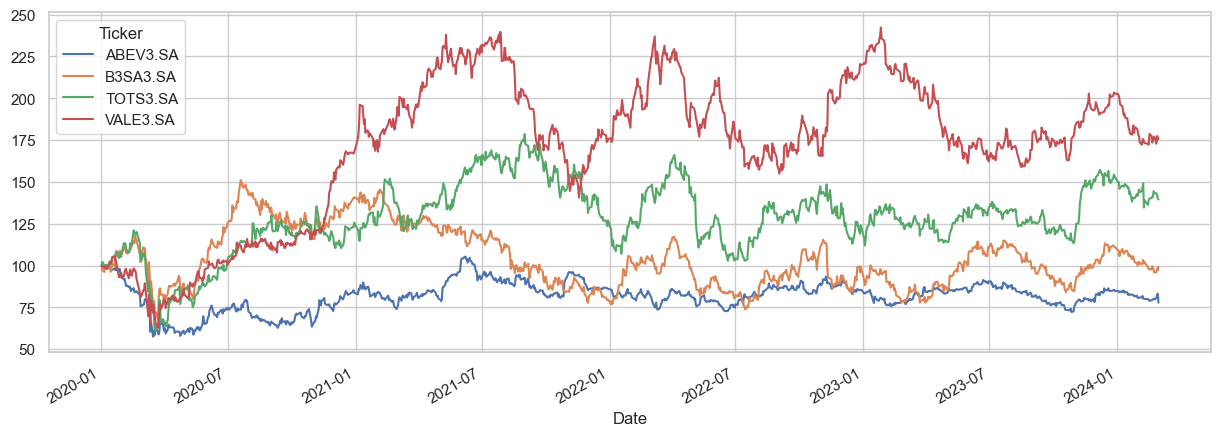

In [17]:
dados.plot(figsize = (15, 5))

In [18]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [19]:
ret_acc = (dados.iloc[-1]/ dados.iloc[0]) - 1
print('Retorno acumulado:\n', ret_acc)

Retorno acumulado:
 Ticker
ABEV3.SA   -0.222264
B3SA3.SA   -0.007383
TOTS3.SA    0.394338
VALE3.SA    0.760940
dtype: float64


In [20]:
ret_aa = ((dados.iloc[-1]/ dados.iloc[0])**(1/5)) - 1
print('Retorno anualizado:\n', ret_aa)

Retorno anualizado:
 Ticker
ABEV3.SA   -0.049031
B3SA3.SA   -0.001481
TOTS3.SA    0.068744
VALE3.SA    0.119822
dtype: float64


In [21]:
vol_aa = dados_chg.std()*np.sqrt(252)
print('Volatilidade anualizada:\n', vol_aa)

Volatilidade anualizada:
 Ticker
ABEV3.SA    0.315467
B3SA3.SA    0.434505
TOTS3.SA    0.445469
VALE3.SA    0.398487
dtype: float64


In [58]:
dados_chg.corr()

Ticker,ABEV3.SA,B3SA3.SA,TOTS3.SA,VALE3.SA
Ticker,,,,
ABEV3.SA,1.000000,0.429711,0.372098,0.236383
B3SA3.SA,0.429711,1.000000,0.570106,0.339405
TOTS3.SA,0.372098,0.570106,1.000000,0.257911
VALE3.SA,0.236383,0.339405,0.257911,1.000000


<Axes: xlabel='Date'>

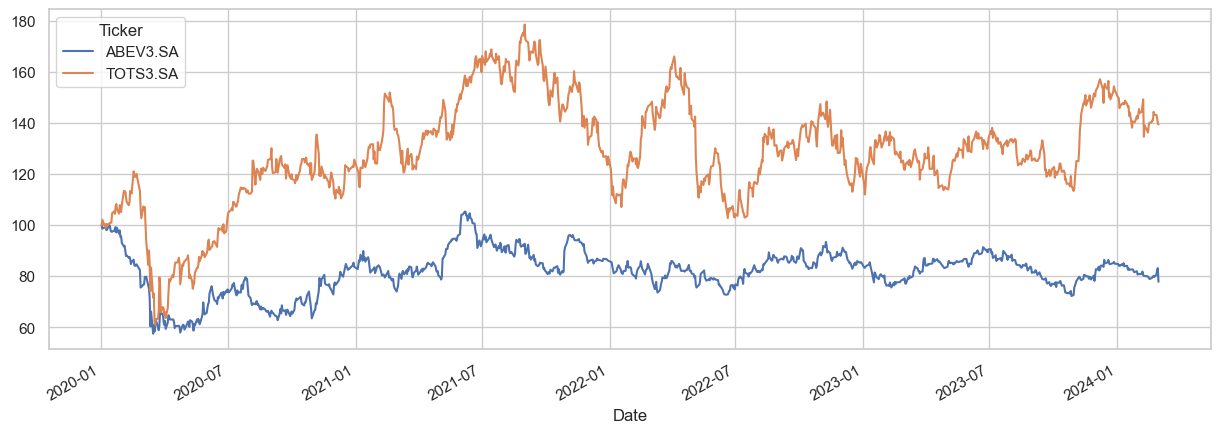

In [23]:
dados[['ABEV3.SA', 'TOTS3.SA']].plot(figsize = (15, 5))

<Axes: xlabel='Date'>

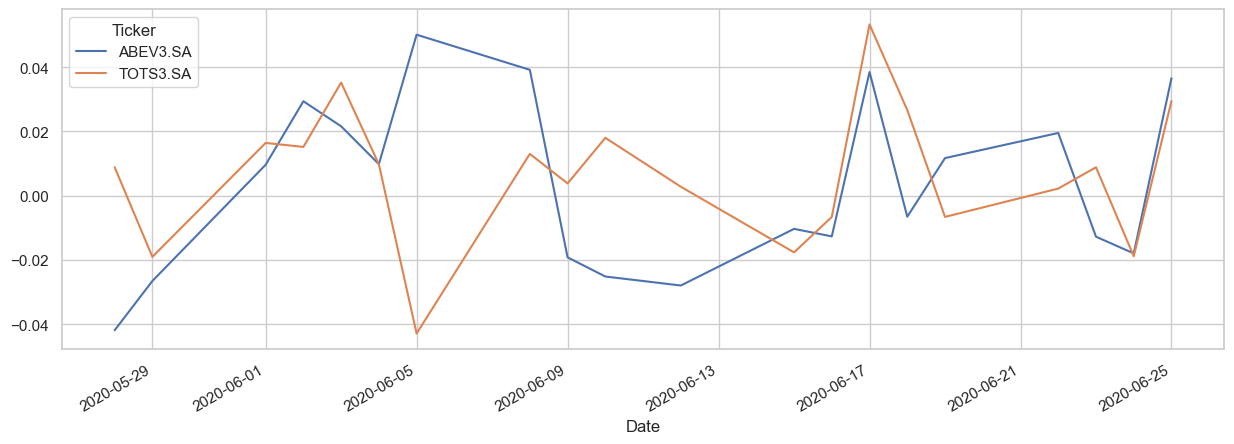

In [25]:
dados_chg[['ABEV3.SA', 'TOTS3.SA']].iloc[100:120].plot(figsize = (15, 5))

In [33]:
port_pesos = [0.5, 0, 0.5, 0]
dados['PORT1'] = dados.dot(port_pesos)

C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\1368815619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['PORT1'] = dados.dot(port_pesos)


In [34]:
display(dados)

Ticker,ABEV3.SA,B3SA3.SA,TOTS3.SA,VALE3.SA,PORT1
Date,,,,,
2020-01-02,16.175148,12.868594,22.010439,36.413353,19.092793
2020-01-03,15.947686,12.497742,22.478340,36.145271,19.213013
2020-01-06,16.023504,12.377928,21.965879,35.930786,18.994692
2020-01-07,16.057205,12.777309,22.058186,36.192181,19.057695
2020-01-08,15.981383,12.743075,21.762165,36.198883,18.871774
...,...,...,...,...,...
2024-02-23,12.890000,12.330221,31.530001,64.495018,22.210001
2024-02-26,13.040000,12.359933,31.520000,62.934811,22.280000
2024-02-27,13.310000,12.627336,31.260000,64.590744,22.285000


<Axes: xlabel='Date'>

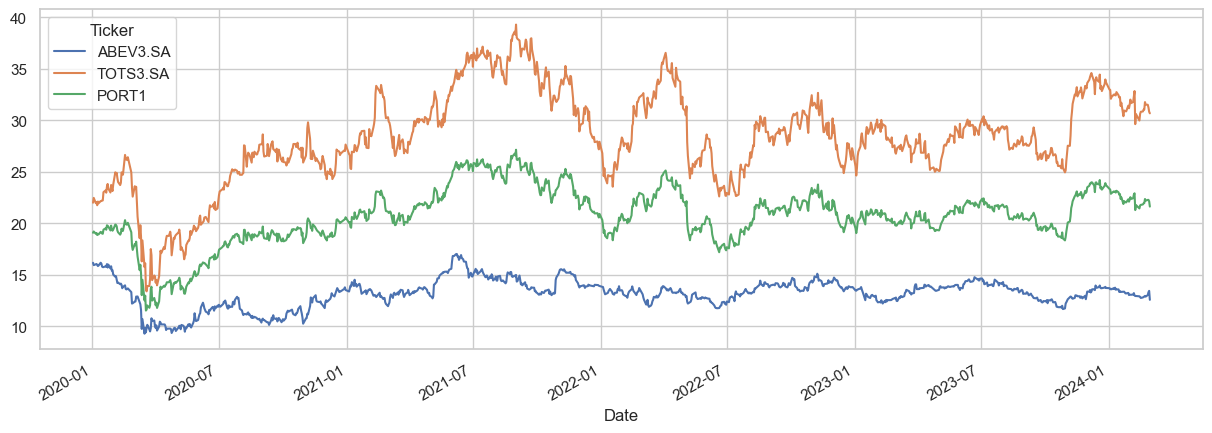

In [35]:
dados[['ABEV3.SA', 'TOTS3.SA', 'PORT1']].plot(figsize = (15, 5))

In [36]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [37]:
ret_acc = (dados.iloc[-1]/ dados.iloc[0]) - 1
print('Retorno acumulado:\n', ret_acc)

Retorno acumulado:
 Ticker
ABEV3.SA   -0.222264
B3SA3.SA   -0.007383
TOTS3.SA    0.394338
VALE3.SA    0.760940
PORT1       0.133150
dtype: float64


In [38]:
ret_aa = ((dados.iloc[-1]/ dados.iloc[0])**(1/5)) - 1
print('Retorno anualizado:\n', ret_aa)

Retorno anualizado:
 Ticker
ABEV3.SA   -0.049031
B3SA3.SA   -0.001481
TOTS3.SA    0.068744
VALE3.SA    0.119822
PORT1       0.025315
dtype: float64


In [39]:
vol_aa = dados_chg.std()*np.sqrt(252)
print('Volatilidade anualizada:\n', vol_aa)

Volatilidade anualizada:
 Ticker
ABEV3.SA    0.315467
B3SA3.SA    0.434505
TOTS3.SA    0.445469
VALE3.SA    0.398487
PORT1       0.350027
dtype: float64


In [40]:
ddown = pd.DataFrame()

for ativo in dados.columns:
    list = []
    for ind in range(dados.count()[0]):
        list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind + 1].max()- 1)*100)
    ddown[ativo] = list

ddown['Data'] = dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

print(ddown.min())

C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count

ABEV3.SA   -42.581986
B3SA3.SA   -51.178382
TOTS3.SA   -49.713333
VALE3.SA   -41.342999
PORT1      -43.216864
dtype: float64


<Axes: xlabel='Data'>

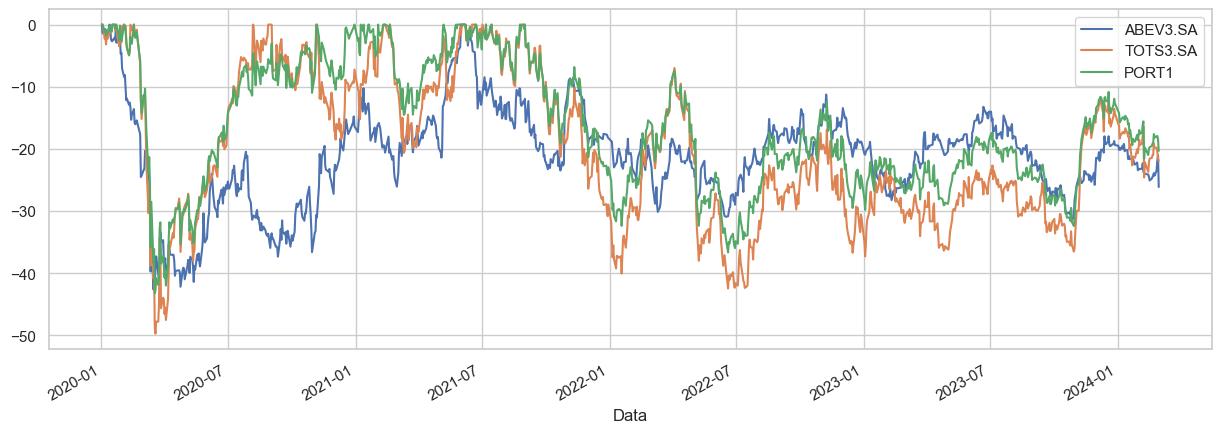

In [41]:
ddown[['ABEV3.SA', 'TOTS3.SA', 'PORT1']].plot(figsize = (15, 5))

## Fronteira Eficiente

In [42]:
dados = dados.drop(['PORT1'], axis = 1)
dados_chg = dados_chg.drop(['PORT1'], axis = 1)

In [43]:
dados.head(3)

Ticker,ABEV3.SA,B3SA3.SA,TOTS3.SA,VALE3.SA
Date,,,,
2020-01-02,16.175148,12.868594,22.010439,36.413353
2020-01-03,15.947686,12.497742,22.478340,36.145271
2020-01-06,16.023504,12.377928,21.965879,35.930786


In [44]:
def calc_ret_vol(ativos, ativos_chg, port_pesos):
    port = ativos.dot(port_pesos)
    port_chg = port.pct_change()
    port_chg = port_chg.fillna(0)
    ret = ((port.iloc[-1]/port.iloc[0])**(1/5)) - 1
    vol = port_chg.std()*np.sqrt(252)

    return ret, vol

In [45]:
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0]
for w in range(0, 101, 5):
    ret, vol = calc_ret_vol(dados, dados_chg, [w/100, 0, (1-w/100), 0])
    print(f"Aloc:{round(w/100, 2):.2f} {round(1 - (w/100), 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
        min_vol_ret[0] = vol
        min_vol_ret[1] = ret
        port_pesos[0] = w/100
        port_pesos[2] = 1-w/100

Aloc:0.00 1.00 Ret:0.069 Vol:0.445
Aloc:0.05 0.95 Ret:0.065 Vol:0.437
Aloc:0.10 0.90 Ret:0.062 Vol:0.428
Aloc:0.15 0.85 Ret:0.058 Vol:0.419
Aloc:0.20 0.80 Ret:0.054 Vol:0.410
Aloc:0.25 0.75 Ret:0.049 Vol:0.401
Aloc:0.30 0.70 Ret:0.045 Vol:0.391
Aloc:0.35 0.65 Ret:0.040 Vol:0.381
Aloc:0.40 0.60 Ret:0.036 Vol:0.371
Aloc:0.45 0.55 Ret:0.031 Vol:0.360
Aloc:0.50 0.50 Ret:0.025 Vol:0.350
Aloc:0.55 0.45 Ret:0.020 Vol:0.340
Aloc:0.60 0.40 Ret:0.014 Vol:0.330
Aloc:0.65 0.35 Ret:0.008 Vol:0.320
Aloc:0.70 0.30 Ret:0.001 Vol:0.311
Aloc:0.75 0.25 Ret:-0.006 Vol:0.304
Aloc:0.80 0.20 Ret:-0.014 Vol:0.298
Aloc:0.85 0.15 Ret:-0.021 Vol:0.296
Aloc:0.90 0.10 Ret:-0.030 Vol:0.297
Aloc:0.95 0.05 Ret:-0.039 Vol:0.303
Aloc:1.00 0.00 Ret:-0.049 Vol:0.315


In [46]:
print(min_vol_ret)
print(port_pesos)

[0.2957082553950511, -0.0214764375600226]
[0.85, 0, 0.15000000000000002, 0]


Text(0.2957082553950511, -0.0214764375600226, 'Min, Vol')

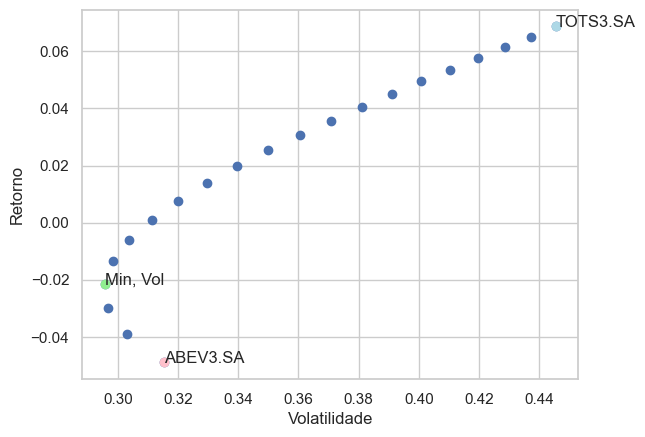

In [47]:
lp = np.array(points).T
plt.scatter(lp[[1][:]], lp[[0][:]])
plt.ylabel('Retorno')
plt.xlabel('Volatilidade')

plt.scatter(vol_aa['ABEV3.SA'], ret_aa['ABEV3.SA'], color = 'pink')
plt.text(vol_aa['ABEV3.SA'], ret_aa['ABEV3.SA'], 'ABEV3.SA')

plt.scatter(vol_aa['TOTS3.SA'], ret_aa['TOTS3.SA'], color = 'lightblue')
plt.text(vol_aa['TOTS3.SA'], ret_aa['TOTS3.SA'], 'TOTS3.SA')

plt.scatter(min_vol_ret[0], min_vol_ret[1], color = 'lightgreen')
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min, Vol')

In [48]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [50]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5)) - 1
print('Retorno anualizado:\n', ret_aa)

vol_aa = dados_chg.std()*np.sqrt(252)
print('Volatilidade anualizada:\n', vol_aa)

Retorno anualizado:
 Ticker
ABEV3.SA   -0.049031
B3SA3.SA   -0.001481
TOTS3.SA    0.068744
VALE3.SA    0.119822
PORT1      -0.021476
dtype: float64
Volatilidade anualizada:
 Ticker
ABEV3.SA    0.315467
B3SA3.SA    0.434505
TOTS3.SA    0.445469
VALE3.SA    0.398487
PORT1       0.295708
dtype: float64


In [51]:
ddown = pd.DataFrame()

for ativo in dados.columns:
    list = []
    for ind in range(dados.count()[0]):
        list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind + 1].max()- 1)*100)
    ddown[ativo] = list

ddown['Data'] = dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

print(ddown.min())

C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count

ABEV3.SA   -42.581986
B3SA3.SA   -51.178382
TOTS3.SA   -49.713333
VALE3.SA   -41.342999
PORT1      -41.439039
dtype: float64


<Axes: xlabel='Data'>

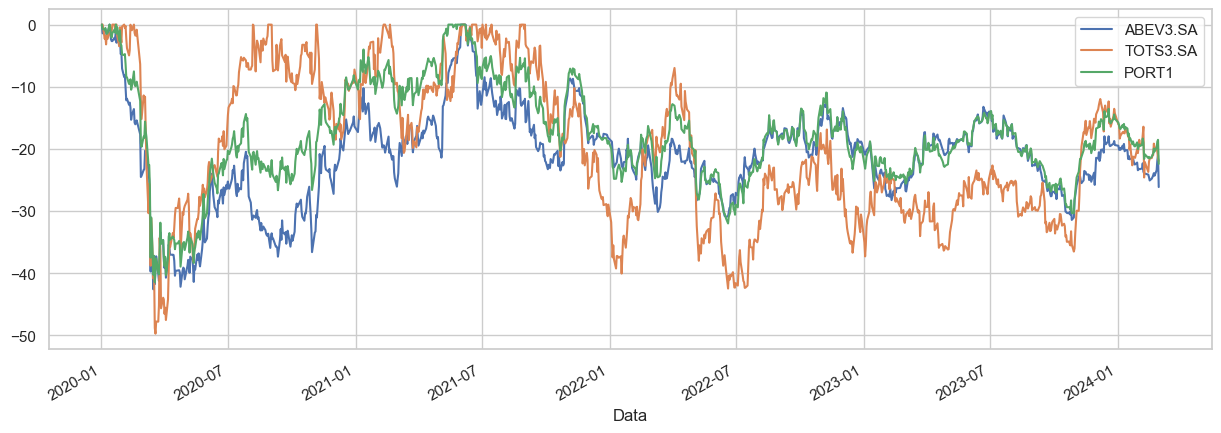

In [52]:
ddown[['ABEV3.SA', 'TOTS3.SA', 'PORT1']].plot(figsize = (15, 5))

In [53]:
dados = dados.drop(['PORT1'], axis = 1)
dados_chg = dados_chg.drop(['PORT1'], axis = 1)

In [55]:
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0]
for w1 in range(0, 101, 5):
    for w2 in range(0, 101-w1, 5):
        ret, vol = calc_ret_vol(dados, dados_chg, [w1/100, w2/100, (1-w1/100-w2/100), 0])
        print(f"Aloc:{round(w1/100, 2):.2f} {round(1 - (w2/100), 2):.2f} {round(1-w1/100-w2/100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
        points.append([ret, vol])
        if vol < min_vol_ret[0]:
            min_vol_ret[0] = vol
            min_vol_ret[1] = ret
            port_pesos[0] = w/100
            port_pesos[1] = 1-w/100
            port_pesos[2] = 1-w1/100-w2/100

Aloc:0.00 1.00 1.00 Ret:0.069 Vol:0.445
Aloc:0.00 0.95 0.95 Ret:0.067 Vol:0.440
Aloc:0.00 0.90 0.90 Ret:0.065 Vol:0.435
Aloc:0.00 0.85 0.85 Ret:0.063 Vol:0.430
Aloc:0.00 0.80 0.80 Ret:0.061 Vol:0.425
Aloc:0.00 0.75 0.75 Ret:0.059 Vol:0.419
Aloc:0.00 0.70 0.70 Ret:0.056 Vol:0.414
Aloc:0.00 0.65 0.65 Ret:0.054 Vol:0.410
Aloc:0.00 0.60 0.60 Ret:0.051 Vol:0.405
Aloc:0.00 0.55 0.55 Ret:0.048 Vol:0.401
Aloc:0.00 0.50 0.50 Ret:0.045 Vol:0.397
Aloc:0.00 0.45 0.45 Ret:0.042 Vol:0.393
Aloc:0.00 0.40 0.40 Ret:0.038 Vol:0.391
Aloc:0.00 0.35 0.35 Ret:0.035 Vol:0.389
Aloc:0.00 0.30 0.30 Ret:0.031 Vol:0.389
Aloc:0.00 0.25 0.25 Ret:0.026 Vol:0.390
Aloc:0.00 0.20 0.20 Ret:0.022 Vol:0.393
Aloc:0.00 0.15 0.15 Ret:0.017 Vol:0.398
Aloc:0.00 0.10 0.10 Ret:0.011 Vol:0.406
Aloc:0.00 0.05 0.05 Ret:0.005 Vol:0.418
Aloc:0.00 0.00 0.00 Ret:-0.001 Vol:0.435


Aloc:0.05 1.00 0.95 Ret:0.065 Vol:0.437
Aloc:0.05 0.95 0.90 Ret:0.063 Vol:0.432
Aloc:0.05 0.90 0.85 Ret:0.061 Vol:0.426
Aloc:0.05 0.85 0.80 Ret:0.059 Vol:0.421
Aloc:0.05 0.80 0.75 Ret:0.057 Vol:0.415
Aloc:0.05 0.75 0.70 Ret:0.054 Vol:0.410
Aloc:0.05 0.70 0.65 Ret:0.052 Vol:0.404
Aloc:0.05 0.65 0.60 Ret:0.049 Vol:0.399
Aloc:0.05 0.60 0.55 Ret:0.046 Vol:0.395
Aloc:0.05 0.55 0.50 Ret:0.043 Vol:0.390
Aloc:0.05 0.50 0.45 Ret:0.040 Vol:0.386
Aloc:0.05 0.45 0.40 Ret:0.036 Vol:0.383
Aloc:0.05 0.40 0.35 Ret:0.032 Vol:0.381
Aloc:0.05 0.35 0.30 Ret:0.028 Vol:0.379
Aloc:0.05 0.30 0.25 Ret:0.024 Vol:0.379
Aloc:0.05 0.25 0.20 Ret:0.019 Vol:0.381
Aloc:0.05 0.20 0.15 Ret:0.014 Vol:0.386
Aloc:0.05 0.15 0.10 Ret:0.009 Vol:0.393
Aloc:0.05 0.10 0.05 Ret:0.002 Vol:0.404
Aloc:0.05 0.05 0.00 Ret:-0.004 Vol:0.419
Aloc:0.10 1.00 0.90 Ret:0.062 Vol:0.428
Aloc:0.10 0.95 0.85 Ret:0.059 Vol:0.423
Aloc:0.10 0.90 0.80 Ret:0.057 Vol:0.417
Aloc:0.10 0.85 0.75 Ret:0.055 Vol:0.411
Aloc:0.10 0.80 0.70 Ret:0.052 Vol:0.405

In [56]:
print(min_vol_ret)
print(port_pesos)

[0.2908530995570758, -0.023764076050048266]
[1.0, 0.0, 0.1, 0]


Text(0.2908530995570758, -0.023764076050048266, 'Min, Vol')

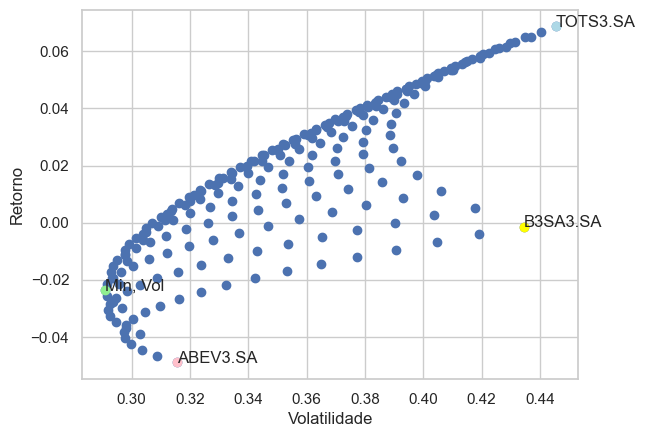

In [57]:
lp = np.array(points).T
plt.scatter(lp[[1][:]], lp[[0][:]])
plt.ylabel('Retorno')
plt.xlabel('Volatilidade')

plt.scatter(vol_aa['ABEV3.SA'], ret_aa['ABEV3.SA'], color = 'pink')
plt.text(vol_aa['ABEV3.SA'], ret_aa['ABEV3.SA'], 'ABEV3.SA')

plt.scatter(vol_aa['B3SA3.SA'], ret_aa['B3SA3.SA'], color = 'yellow')
plt.text(vol_aa['B3SA3.SA'], ret_aa['B3SA3.SA'], 'B3SA3.SA')

plt.scatter(vol_aa['TOTS3.SA'], ret_aa['TOTS3.SA'], color = 'lightblue')
plt.text(vol_aa['TOTS3.SA'], ret_aa['TOTS3.SA'], 'TOTS3.SA')

plt.scatter(min_vol_ret[0], min_vol_ret[1], color = 'lightgreen')
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min, Vol')

In [59]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = (dados - dados.shift(1))/ dados.shift(1)
dados_chg = dados_chg.fillna(0)

In [60]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5)) - 1
print('Retorno anualizado:\n', ret_aa)

vol_aa = dados_chg.std()*np.sqrt(252)
print('Volatilidade anualizada:\n', vol_aa)

Retorno anualizado:
 Ticker
ABEV3.SA   -0.049031
B3SA3.SA   -0.001481
TOTS3.SA    0.068744
VALE3.SA    0.119822
PORT1      -0.031619
dtype: float64
Volatilidade anualizada:
 Ticker
ABEV3.SA    0.315467
B3SA3.SA    0.434505
TOTS3.SA    0.445469
VALE3.SA    0.398487
PORT1       0.297513
dtype: float64


In [61]:
ddown = pd.DataFrame()

for ativo in dados.columns:
    list = []
    for ind in range(dados.count()[0]):
        list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind + 1].max()- 1)*100)
    ddown[ativo] = list

ddown['Data'] = dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

print(ddown.min())

C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
C:\Users\yasmi\AppData\Local\Temp\ipykernel_4472\4201981190.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count

ABEV3.SA   -42.581986
B3SA3.SA   -51.178382
TOTS3.SA   -49.713333
VALE3.SA   -41.342999
PORT1      -41.371338
dtype: float64


<Axes: xlabel='Data'>

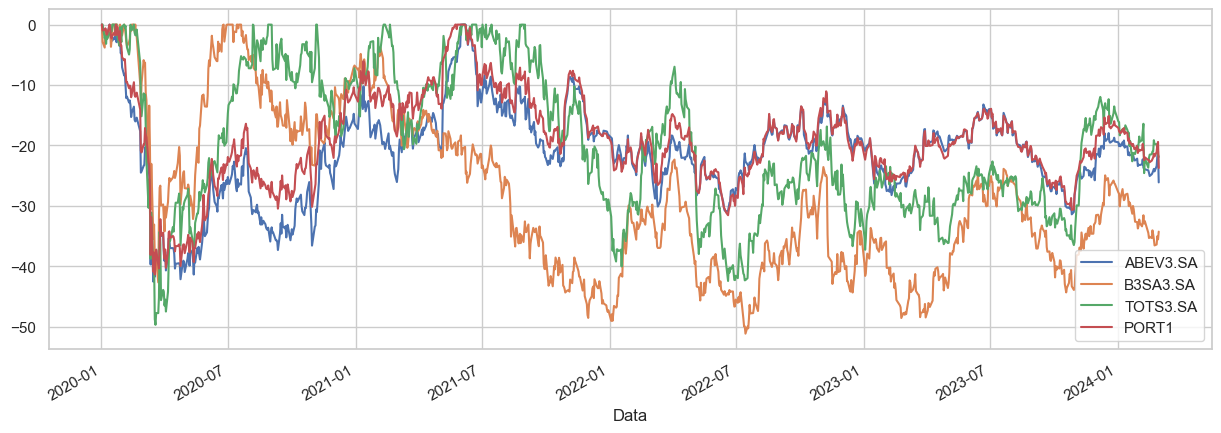

In [63]:
ddown[['ABEV3.SA', 'B3SA3.SA', 'TOTS3.SA', 'PORT1']].plot(figsize = (15, 5))

<Axes: xlabel='Date'>

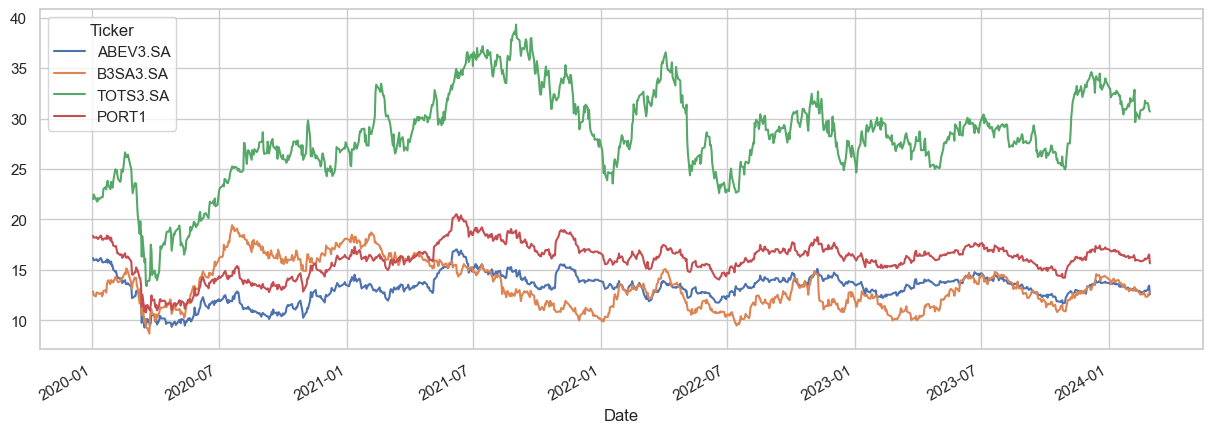

In [64]:
dados[['ABEV3.SA', 'B3SA3.SA', 'TOTS3.SA', 'PORT1']].plot(figsize = (15, 5))